## 1. Importing Libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor


## 2. Load Dataset

In [4]:
df = pd.read_csv('car data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

## 3. Checking for NULL values

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

In [9]:
df.shape

(301, 9)

In [12]:
df.sample(12)

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  \
143     Yamaha FZ  v 2.0  2016           0.60           0.84       25000   
99              fortuner  2010           9.65          20.45       50024   
17                ertiga  2016           7.75          10.79       43000   
110            KTM RC200  2016           1.20           1.78        6000   
260                 city  2016           9.15          13.60       29223   
12                  ciaz  2015           7.50           9.94       15000   
4                  swift  2014           4.60           6.87       42450   
173            Activa 4g  2017           0.40           0.51        1300   
210                  i10  2012           3.10           4.60       35775   
185    Suzuki Access 125  2008           0.25           0.58        1900   
153  Bajaj Pulsar NS 200  2013           0.50           0.99       45000   
84                innova  2005           3.49          13.46      197176   

    Fuel_Type Seller_Type Transmission  Owner  
143    Petrol  Individual       Manual      0  
99     Diesel      Dealer       Manual      0  
17     Diesel      Dealer       Manual      0  
110    Petrol  Individual       Manual      0  
260    Petrol      Dealer       Manual      0  
12     Petrol      Dealer    Automatic      0  
4      Diesel      Dealer       Manual      0  
173    Petrol  Individual    Automatic      0  
210    Petrol      Dealer       Manual      0  
185    Petrol  Individual    Automatic      0  
153    Petrol  Individual       Manual      0  
84     Diesel      Dealer       Manual      0

 ## 4. Calculate the correlation matrix

In [18]:
numeric_columns = df[['Year', 'Selling_Price', 'Present_Price',
'Kms_Driven','Owner']]
correlation_matrix = numeric_columns.corr()

The correlation matrix shows the strength and direction of the linear relationships between the numeric columns in your DataFrame. A value of 1 indicates a perfect positive correlation, while a value of -1 indicates a perfect negative correlation. A value of 0 indicates no linear relationship.


## 5. Create a heatmap of the correlation matrix

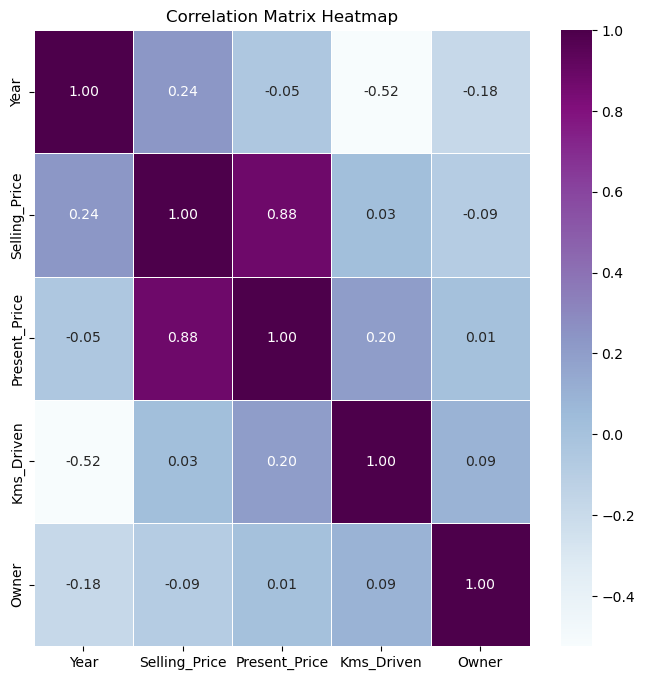

In [23]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f",
linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In this case, all the correlations are positive, indicating that the numeric columns tend to move in the same direction. For example, there is a strong positive correlation between 'Selling_Price' and 'Present_Price', which means that cars with higher selling prices also tend to have higher present prices.

It is important to note that correlation does not imply causation. Just because two variables are correlated does not mean that one causes the other. However, correlation can be a useful tool for identifying potential relationships between variables that you can be explored further.

#top_car

In [24]:
top_car = df['Car_Name'].value_counts().nlargest(10)